In [92]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set(style= 'white', color_codes=True)
sns.set(font_scale=1.5)

In [74]:
train = pd.read_csv("data/Titanic-Train.csv")
print(train.shape)
train.head()

(891, 11)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [76]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [77]:
train['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [78]:
train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [79]:
train.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [80]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [81]:
train.groupby(['pclass']).mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [82]:
train['age'] = train[['age', 'pclass']].apply(age_approx, axis=1)
train.dropna(inplace=True)
train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [83]:
train.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [84]:
train_dummies = pd.get_dummies(train, columns = ['sex', 'embarked'])
train_dummies.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

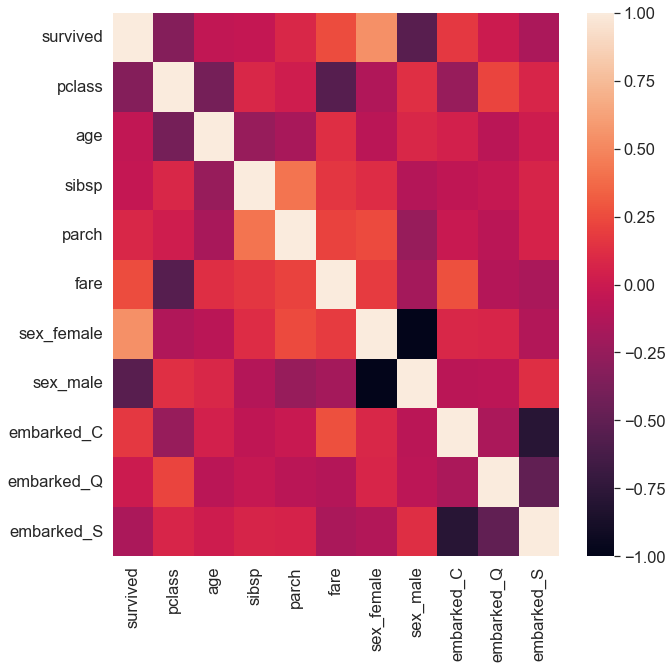

In [85]:
plt.figure(figsize=(10,10))

sns.heatmap(train_dummies.corr())

In [86]:
used_features = ['pclass', 'age', 'sibsp', 'parch', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']

X = train_dummies[used_features].values
y = train_dummies['survived']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=1)
print(f'x_train:{x_train.shape}, y_train:{y_train.shape}, \n'
      f'x_test:{x_test.shape}, y_test:{y_test.shape}')

x_train:(622, 9), y_train:(622,), 
x_test:(267, 9), y_test:(267,)


In [88]:
logisticModel = LogisticRegression()

logisticModel.fit(x_train, y_train)

y_pred = logisticModel.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [89]:
metrics.accuracy_score(y_test, y_pred)

0.8314606741573034

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [100]:
print("Coefficients: ", used_features, logisticModel.coef_, sep='\n')
print("Intercept:", logisticModel.intercept_)

Coefficients: 
['pclass', 'age', 'sibsp', 'parch', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']
[[-1.0417637  -0.03988722 -0.24209473 -0.040671    1.19325293 -1.19486922
   0.34889847 -0.03763003 -0.31288474]]
Intercept: [3.65703961]
